## **Sentiment Analysis on Product Reviews**
###  Project Type - NLP Machine Learning Project
###  Contribution - Individual
###  Name - Divyansh Kumar

## Importing Necessary Libararies

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

## Loading the Dataset

In [23]:
data = pd.read_csv('Dataset-SA.csv').sample(frac=0.1,random_state=42)

In [24]:
data.head(2)

,product_name,product_price,Rate,Review,Summary,Sentiment
193551,BAJAJ 17 L Solo Microwave Oven1701MT White,4498,1,worst experience ever!,not working properly,neutral
149083,ScotchBrite Sponge WipeLarge Pack of 3,189,5,just wow!,very good,positive


In [25]:
data.columns

Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20505 entries, 193551 to 6754
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_name   20505 non-null  object
 1   product_price  20505 non-null  object
 2   Rate           20505 non-null  object
 3   Review         18050 non-null  object
 4   Summary        20504 non-null  object
 5   Sentiment      20505 non-null  object
dtypes: object(6)
memory usage: 1.1+ MB


In [27]:
data.shape

(20505, 6)

In [28]:
data.size

123030

In [29]:
data.isnull().sum()

product_name        0
product_price       0
Rate                0
Review           2455
Summary             1
Sentiment           0
dtype: int64

## Visualize the sentiment distribution
* The next step now is to count the frequency of each category of sentiments in the data.
* This will return both the index of each category and the values
* So we can use the two to make a bar plot

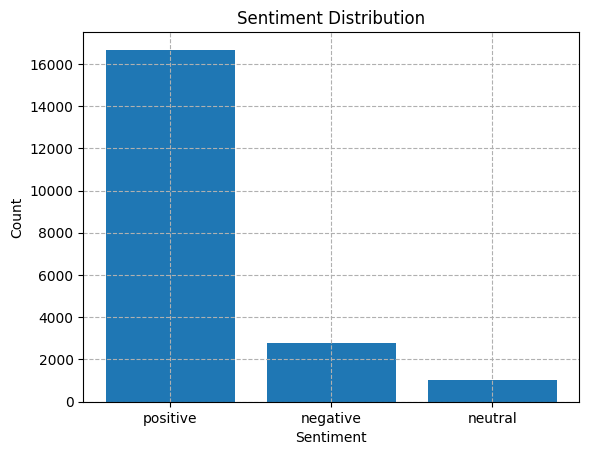

In [30]:
sentiment_counts = data['Sentiment'].value_counts()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.grid(linestyle='--')
plt.show()

## Visualize the customers review summary using WordCloud
* We have to create a text variable which is basically the text data to be visualized
* Then we have to set the parameters of the wordcloud
* The matplotlib imshow function is then called to visualize the texts

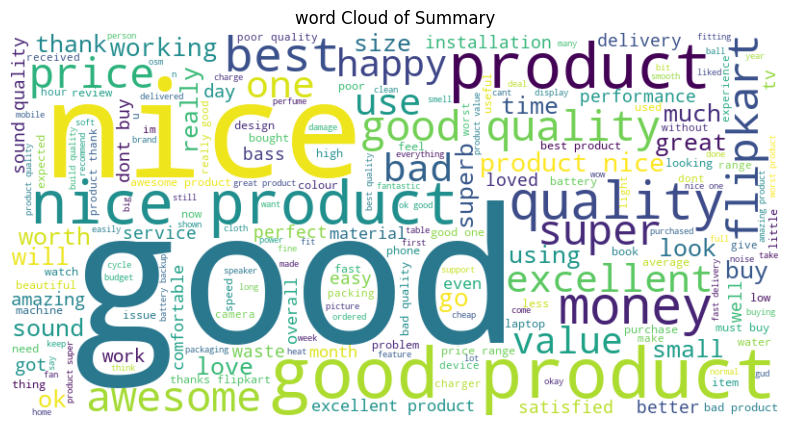

In [31]:
text = ' '.join(data['Summary'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('word Cloud of Summary')
plt.show()

## Features extraction and split the data (train and test set)
* The next step is to select the features for our model such as the predictorand target variable
* In this case "summary" column is the predictor and "sentiment" column is the target variable
* Then we proceed to split the data into both the training and testing sets (80:20)

In [32]:
data = data.dropna()
x = data['Summary']
y = data['Sentiment']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Vectorization of the text data
* We now have to convert the data into the format that the algorithms understand
* This is called vectorization
* Both the train and test sets have to be vectorized
* This is a crucial step in machine learning models that use text data

In [33]:
vectorizer = CountVectorizer()
x_train_counts = vectorizer.fit_transform(x_train)
x_test_counts = vectorizer.transform(x_test)

## Training - Multinomial Naive Bayes classifier
* After we get our data ready for training then we proceed to initiating the model
* Then supply the training data to the model for it to learn

In [34]:
nb_classifier = MultinomialNB()
nb_classifier.fit(x_train_counts, y_train)

MultinomialNB()

## Make Predictions and check the accuracy of the model

In [36]:
y_pred_nb = nb_classifier.predict(x_test_counts)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Multinomial Naive Bayes Accuracy:",accuracy_nb)
print("Multinomial Naive Bayes Classifiaction Report:")
print(classification_report(y_test, y_pred_nb))

Multinomial Naive Bayes Accuracy: 0.896398891966759
Multinomial Naive Bayes Classifiaction Report:
              precision    recall  f1-score   support

    negative       0.82      0.63      0.71       464
     neutral       0.78      0.04      0.08       172
    positive       0.90      0.99      0.94      2974

    accuracy                           0.90      3610
   macro avg       0.84      0.55      0.58      3610
weighted avg       0.89      0.90      0.87      3610



## Training -RandomForest

In [37]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_counts, y_train)

RandomForestClassifier(random_state=42)

In [38]:
y_pred_rf = rf_classifier.predict(x_test_counts)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\nRandom Forest Classifier Accuracy:",accuracy_rf)
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.9274238227146815
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

    negative       0.85      0.78      0.82       464
     neutral       0.67      0.34      0.45       172
    positive       0.95      0.98      0.96      2974

    accuracy                           0.93      3610
   macro avg       0.82      0.70      0.74      3610
weighted avg       0.92      0.93      0.92      3610



## Prediction on New Data
* To make prediction on new data, let's write short function for each model
* The functions take the customer reviews as text then
* Vectorize the input
* Then pass it to the already-trained model to return the class of the sentiment

In [39]:
def predict_sentiment_mt(text):
    text_counts = vectorizer.transform([text])
    prediction = nb_classifier.predict(text_counts)[0]
    return prediction


def predict_sentiment_rf(text):
    text_counts = vectorizer.transform([text])
    prediction = rf_classifier.predict(text_counts)[0]
    return prediction

## Case Study

In [49]:
input_text = "really good product"
predicted_sentiment = predict_sentiment_rf(input_text)
print("predicted sentiment:", predicted_sentiment)

predicted sentiment: positive


## Models Performance - Interpretation

**➤ Multinomial Naive Bayes Model:**
* Accuracy: 89.64%
* Precision for negative sentiment: 82%
* Recall for negative sentiment: 63%
* Fl-core for negative sentiment: 71%
* Precision for neutral sentiment: 78%
* Recall for neutral sentiment: 4%
* Fl-score for neutral sentiment: 8%
* Precision for positive sentiment: 90%
* Recall for positive sentiment: 99%
* F1-score for positive sentiment: 94%


* The model performs well in identifying positive sentiment but struggles with neutral sentiment due to low recall and
Fl-score.
* Overall, the weighted average Fl-score is 87%, indicating decent performance across all classes.


**➤ Random Forest Classifier Model:**
* Accuracy: 92.74%
* Precision for negative sentiment: 85%
* Recall for negative sentiment: 78%
* Fl-score for negative sentiment: 82%
* Precision for neutral sentiment: 67%
* Recall for neutral sentiment: 34%
* Fl-score for neutral sentiment: 45%
* Precision for positive sentiment: 95%
* Recall for positive sentiment: 98%
* F1-score for positive sentiment: 96%
  

* The model outperforms the Naive Bayer model in all metrics, achieving higher accuracy and better precision, recall, and F1-score across all classes.
* It shows a similar pattern of struggling with neutral sentiment but performs exceptionally well in identifying positive sentiment.
* Overall, the weighted average F1-score is 92, indicating sinetior performance.compared in the Nave Raves model.